Introdução
==========

*Arquivos estruturados* são arquivos de dados que possuem uma estrutura
rígida e pré-definida. Eles são muito utilizados para troca de dados
entre sistemas computacionais diferentes.

Nesses arquivos existem caracteres que farão papel de *delimitadores* de
linhas e colunas. Por exemplo, se o caractere `;` separa colunas
(atributos) e o caractere `quebra de linha` separa linhas (objetos),
então uma base de dados pode ser representada em um arquivo da seguinte
forma:

```
Campus;Curso;2018;2019;2020;2021
Campinas;Engenharia Elétrica (Integral);18,8;22,6;20,8;11,9
Campinas;Engenharia Elétrica (Noturno);14,8;20,0;19,1;11,7
Campinas;Engenharia de Computação (Integral);24,1;35,7;38,0;32,2
Campinas;Ciência da Computação (Noturno);27,9;39,1;40,5;37,0
Limeira;Sistemas de Informação (Integral);6,3;8,5;;
Piracicaba;Odontologia (Integral);32,1;34,6;31,3;22,6
```

Note que todas as linhas possuem cinco separadores de coluna, indicando
que a tabela possui seis colunas.

Esse formato de arquivo é conhecido como **CSV** (*Comma-separated
values*).

> Qualquer programa que manipula planilhas (Excel, Libreoffice Calc,
> Planilhas Google) e mesmo programas simples como o bloco de notas
> conseguem salvar, abrir e manipular arquivos em formato CSV. Com os
> programas de planilhas, no entanto, é possível criar gráficos,
> atualizar informações, criar novas linhas e colunas, ordenar os dados
> de acordo com alguma das colunas, filtrar dados para que apenas linhas
> relevantes sejam mostradas, etc. Todas essas coisas e muitas outras
> podem ser feitas usando Python.

> **Veremos a seguir como manipular bases de dados salvas
> em arquivos CSV utilizando Python.**

Manipulação de dados em Python
==============================

### Introdução

Lembrando, em Python, uma *biblioteca* é simplesmente um conjunto de
funções. Por padrão, várias bibliotecas já são inclusas, mas para
realização de tarefas mais específicas precisamos incluir novas
bibliotecas em nosso programa.

**Pandas** é uma biblioteca que fornece funções para manipulação e
análise de dados em formato de tabela.

> **De modo algum conseguiremos cobrir todas as funcionalidades
> disponibilizadas pelo Pandas.**

Para utilizá-la, o começo do nosso programa deve conter a linha
`import pandas as pd`. Para acessar qualquer função do Pandas usaremos o
prefixo `pd`.

In [1]:
import pandas as pd

Agora temos disponíveis as funções que estão definidas na biblioteca
Pandas.

Podemos, por exemplo, abrir o arquivo `vestibular-candidatos_por_vaga.csv` por meio da função
`pd.read_csv()`.

Esse arquivo contém informação sobre a quantidade de candidatos por vaga para o vestibular de alguns cursos da UNICAMP. Essa função recebe o
caminho com o nome do arquivo. Funciona inclusive com URLs como abaixo.  Além disso, passamos o parâmetro `sep` para indicar o caractere usado na separação dos campos, `;` no caso.


In [2]:
url = 'https://drive.google.com/file/d/1eBeKGFJzmuDJQPFg59gtuh4BgJJDOwp_/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
unicamp = pd.read_csv(path,sep=";")

Uma das características do Pandas, e de outras bibliotecas Python, é o
uso constante de parâmetros *default*. Para entender melhor a razão,
basta verificar todos os parâmetros possíveis na função read_csv
(`?pd.read_csv`).

Bases de dados são armazenadas em um tipo de dados chamada *DataFrame*
no Pandas. Vamos ver o que é possível fazer em DataFrames. Em primeiro
lugar, nós podemos visualizar o conteúdo de um DataFrame. Perceba como a
primeira linha contém os rótulos das colunas.

In [3]:
print(unicamp)

       Campus                                Curso  2018  2019  2020  2021
0    Campinas       Engenharia Elétrica (Integral)  18.8  22.6  20.8  11.9
1    Campinas        Engenharia Elétrica (Noturno)  14.8  20.0  19.1  11.7
2    Campinas  Engenharia de Computação (Integral)  24.1  35.7  38.0  32.2
3    Campinas      Ciência da Computação (Noturno)  27.9  39.1  40.5  37.0
4     Limeira    Sistemas de Informação (Integral)   6.3   8.5   NaN   NaN
5  Piracicaba               Odontologia (Integral)  32.1  34.6  31.3  22.6


Podemos também visualizar apenas as primeiras linhas (o que vai ser mais
útil em arquivos maiores):

In [4]:
print(unicamp.head(3)) # o parâmetro de head() indica o número de linhas impressas

     Campus                                Curso  2018  2019  2020  2021
0  Campinas       Engenharia Elétrica (Integral)  18.8  22.6  20.8  11.9
1  Campinas        Engenharia Elétrica (Noturno)  14.8  20.0  19.1  11.7
2  Campinas  Engenharia de Computação (Integral)  24.1  35.7  38.0  32.2


### Manipulando um DataFrame

Podemos verificar o tamanho do DataFrame (número de linhas, número de
colunas):

In [5]:
print(unicamp.shape)

(6, 6)


Podemos visualizar uma coluna específica do DataFrame. Basta indicar uma
lista com o rótulo da coluna:

In [6]:
coluna = ["Curso"] # essa é uma lista que tem um elemento, o texto "Curso"
print(unicamp[coluna])

                                 Curso
0       Engenharia Elétrica (Integral)
1        Engenharia Elétrica (Noturno)
2  Engenharia de Computação (Integral)
3      Ciência da Computação (Noturno)
4    Sistemas de Informação (Integral)
5               Odontologia (Integral)


In [7]:
coluna = ["2019"]
print(unicamp[coluna])

   2019
0  22.6
1  20.0
2  35.7
3  39.1
4   8.5
5  34.6


Ou visualizar várias colunas:

In [8]:
#note que os nomes das colunas são do tipo string
colunas = ["2019", "2020", "2021"]
print(unicamp[colunas])

   2019  2020  2021
0  22.6  20.8  11.9
1  20.0  19.1  11.7
2  35.7  38.0  32.2
3  39.1  40.5  37.0
4   8.5   NaN   NaN
5  34.6  31.3  22.6


Note nos exemplos anteriores que a primeira coluna não tem rótulo e
contém números de 0 a 5 que não estão presentes no arquivo original.

Essa coluna contém o que chamamos de *índice* da tabela: cada linha tem
um único índice que a identifica. A primeira linha tem índice 0, a
segunda tem índice 1 e assim por diante.

Podemos utilizar os índices para visualizar uma linha específica usando
`loc`:

In [9]:
linha = [4] # essa é uma lista que tem um elemento, o número 4
print(unicamp.loc[linha])

    Campus                              Curso  2018  2019  2020  2021
4  Limeira  Sistemas de Informação (Integral)   6.3   8.5   NaN   NaN


Ou visualizar várias linhas:

In [10]:
linhas = [0, 1, 3, 5] # essa lista contém 4 elementos
print(unicamp.loc[linhas])

       Campus                            Curso  2018  2019  2020  2021
0    Campinas   Engenharia Elétrica (Integral)  18.8  22.6  20.8  11.9
1    Campinas    Engenharia Elétrica (Noturno)  14.8  20.0  19.1  11.7
3    Campinas  Ciência da Computação (Noturno)  27.9  39.1  40.5  37.0
5  Piracicaba           Odontologia (Integral)  32.1  34.6  31.3  22.6


Podemos filtrar o conteúdo a ser impresso de acordo com alguma condição.

Por exemplo, queremos visualizar apenas as linhas dos cursos que tiveram
mais de 20 candidatos por vaga no ano de 2020:

In [11]:
condicao = unicamp["2020"] > 20
print(unicamp[condicao])

       Campus                                Curso  2018  2019  2020  2021
0    Campinas       Engenharia Elétrica (Integral)  18.8  22.6  20.8  11.9
2    Campinas  Engenharia de Computação (Integral)  24.1  35.7  38.0  32.2
3    Campinas      Ciência da Computação (Noturno)  27.9  39.1  40.5  37.0
5  Piracicaba               Odontologia (Integral)  32.1  34.6  31.3  22.6


Ou então apenas as linhas dos cursos de Campinas:

In [12]:
condicao = unicamp["Campus"] == "Campinas"
print(unicamp[condicao])

     Campus                                Curso  2018  2019  2020  2021
0  Campinas       Engenharia Elétrica (Integral)  18.8  22.6  20.8  11.9
1  Campinas        Engenharia Elétrica (Noturno)  14.8  20.0  19.1  11.7
2  Campinas  Engenharia de Computação (Integral)  24.1  35.7  38.0  32.2
3  Campinas      Ciência da Computação (Noturno)  27.9  39.1  40.5  37.0


Na verdade, seria interessante visualizar apenas os cursos que de fato
atendem a essa condição.

Podemos então, dentro das linhas selecionadas, especificar a coluna (ou
colunas) que queremos visualizar:

In [13]:
condicao = unicamp["Campus"] == "Campinas"
print(unicamp[condicao]["Curso"])

0         Engenharia Elétrica (Integral)
1          Engenharia Elétrica (Noturno)
2    Engenharia de Computação (Integral)
3        Ciência da Computação (Noturno)
Name: Curso, dtype: object


### Valores Faltantes

A biblioteca Pandas oferece um jeito fácil de lidar com valores
faltantes das tabelas. Se você visualizar o arquivo CSV em um programa de planilhas ou mesmo em um
programa tipo bloco de notas, verá que alguns elementos da tabela estão
vazios.

Como você pode ver nas visualizações até agora, o Pandas não deixa a
célula vazia, mas sim a preenche com um valor especial, o =NaN=[^1].

E ele fornece uma função chamada `fillna()`, que preenche as células
vazias com um valor desejado.

No nosso exemplo, vamos preencher com o valor 0. Para que as mudanças sejam gravadas na
própria tabela, ao invés de gerar uma cópia, passamos o parâmetro
`inplace`.

In [14]:
unicamp.fillna(0, inplace=True)
print(unicamp)

       Campus                                Curso  2018  2019  2020  2021
0    Campinas       Engenharia Elétrica (Integral)  18.8  22.6  20.8  11.9
1    Campinas        Engenharia Elétrica (Noturno)  14.8  20.0  19.1  11.7
2    Campinas  Engenharia de Computação (Integral)  24.1  35.7  38.0  32.2
3    Campinas      Ciência da Computação (Noturno)  27.9  39.1  40.5  37.0
4     Limeira    Sistemas de Informação (Integral)   6.3   8.5   0.0   0.0
5  Piracicaba               Odontologia (Integral)  32.1  34.6  31.3  22.6


### Agregações

E se quisermos saber o total de candidatos por vaga em um certo ano em
um determinado campus? O Pandas oferece uma função `sum()` que faz esse
cálculo para nós mais facilmente. É importante perceber que isso só é
possível porque as colunas são *válidas* para a operação: exceto pelas
colunas \"Campus\" e \"Curso\", as outras possuem apenas números.

In [15]:
condicao = unicamp["Campus"] == "Campinas"
#tome 1 minuto para entender o que cada pedaço da instrução abaixo faz
#dica: separe em 3 partes e veja cada resultado parcial
total_Campinas = unicamp[condicao].sum()["2019"]
print("Total de candidatos por vaga em Campinas em 2019:", total_Campinas)

Total de candidatos por vaga em Campinas em 2019: 117.4


E se quiséssemos saber para cada campus em cada ano? Poderíamos executar
para 2018, alterar para 2019, executar, alterar, executar ... fazer
todas as variações possíveis. Chato né?! O Pandas fornece uma função
para criação de tabelas dinâmicas (*pivot tables*). O nome da função é,
surpreendemente, pivot_table.

Antes de chamá-la, vamos deixar bem claro o que queremos. Queremos
separar para **cada campus** a **soma** do número de candidatos por vaga
em cada ano, **sendo os anos possíveis 2018, 2019, 2020, 2021**. O
seguinte código realiza exatamente isso:

In [16]:
candidatos_campus_ano = pd.pivot_table(unicamp, values = ['2018','2019', '2020', '2021'], index = ['Campus'], aggfunc = sum)
print(candidatos_campus_ano)

            2018   2019   2020  2021
Campus                              
Campinas    85.6  117.4  118.4  92.8
Limeira      6.3    8.5    0.0   0.0
Piracicaba  32.1   34.6   31.3  22.6


<ipython-input-16-1622a4f05f9f>:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  candidatos_campus_ano = pd.pivot_table(unicamp, values = ['2018','2019', '2020', '2021'], index = ['Campus'], aggfunc = sum)


A função pivot_table é muito útil para fazer agregações. Mas, neste caso
específico podemos simplificar pensando **para cada atributo numérico
somar os valores agrupando por campus**:

In [17]:
candidatos_campus_ano_groupby = unicamp.groupby(['Campus']).sum()
print(candidatos_campus_ano_groupby)

                                                        Curso  2018   2019  \
Campus                                                                       
Campinas    Engenharia Elétrica (Integral)Engenharia Elétr...  85.6  117.4   
Limeira                     Sistemas de Informação (Integral)   6.3    8.5   
Piracicaba                             Odontologia (Integral)  32.1   34.6   

             2020  2021  
Campus                   
Campinas    118.4  92.8  
Limeira       0.0   0.0  
Piracicaba   31.3  22.6  


A função `groupby` gera um `DataFrameGroupBy` no qual você pode aplicar
uma função por grupo. No caso de funções padrão como soma, você pode
aplicar diretamente. Mas, você pode também aplicar sua própria função em
cada grupo usando `apply`.

In [18]:
def first(df):
    return df.head(1)

custom_groupby = unicamp.groupby(['Campus']).apply(first)
print(custom_groupby)

                  Campus                              Curso  2018  2019  2020  \
Campus                                                                          
Campinas   0    Campinas     Engenharia Elétrica (Integral)  18.8  22.6  20.8   
Limeira    4     Limeira  Sistemas de Informação (Integral)   6.3   8.5   0.0   
Piracicaba 5  Piracicaba             Odontologia (Integral)  32.1  34.6  31.3   

              2021  
Campus              
Campinas   0  11.9  
Limeira    4   0.0  
Piracicaba 5  22.6  


<ipython-input-18-f5f7a89b9d91>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  custom_groupby = unicamp.groupby(['Campus']).apply(first)


### Alterando valores na base

Para alterar um único elemento específico da tabela, basta saber o
índice da linha e o rótulo da coluna e utilizar o comando `at[]`. Por
exemplo, vamos atualizar o número de candidatos por vaga no curso de Engenharia Elétrica, período
Noturno, em 2018 no Campus de Campinas. Atualmente esse valor (14.8) encontra-se
na linha de índice 1, mas seu valor desejado é 14.7.

In [19]:
unicamp.at[1, "2018"] = 14.7
print(unicamp)

       Campus                                Curso  2018  2019  2020  2021
0    Campinas       Engenharia Elétrica (Integral)  18.8  22.6  20.8  11.9
1    Campinas        Engenharia Elétrica (Noturno)  14.7  20.0  19.1  11.7
2    Campinas  Engenharia de Computação (Integral)  24.1  35.7  38.0  32.2
3    Campinas      Ciência da Computação (Noturno)  27.9  39.1  40.5  37.0
4     Limeira    Sistemas de Informação (Integral)   6.3   8.5   0.0   0.0
5  Piracicaba               Odontologia (Integral)  32.1  34.6  31.3  22.6


### Adicionando linhas e colunas

Outra funcionalidade importante é adicionar linhas e colunas à tabela
atual. Por exemplo, vamos criar uma coluna nova que vai conter o valor
médio de candidatos por vaga.

Com o Pandas, é bem simples criar colunas novas. Ao acessar
`unicamp[rótulo de coluna]`, se `rótulo de coluna` existe então o Pandas
entende que você quer visualizar aquela coluna. Mas se o rótulo não
existe, então ele entende que você quer criar uma coluna nova. Ao mesmo
tempo vamos inicializá-la com o valor da média.

Veja no exemplo a seguir que o Pandas entende que queremos fazer o
cálculo linha por linha.

In [20]:
unicamp["Média"] = (unicamp["2018"] + unicamp["2019"] + unicamp["2020"] + unicamp["2021"])/4
print(unicamp)

       Campus                                Curso  2018  2019  2020  2021  \
0    Campinas       Engenharia Elétrica (Integral)  18.8  22.6  20.8  11.9   
1    Campinas        Engenharia Elétrica (Noturno)  14.7  20.0  19.1  11.7   
2    Campinas  Engenharia de Computação (Integral)  24.1  35.7  38.0  32.2   
3    Campinas      Ciência da Computação (Noturno)  27.9  39.1  40.5  37.0   
4     Limeira    Sistemas de Informação (Integral)   6.3   8.5   0.0   0.0   
5  Piracicaba               Odontologia (Integral)  32.1  34.6  31.3  22.6   

    Média  
0  18.525  
1  16.375  
2  32.500  
3  36.125  
4   3.700  
5  30.150  


Vamos também inserir uma coluna \"Total\", com a soma dos candidatos por vaga em todos os anos anteriores:

In [21]:
unicamp["Total"] = unicamp["2018"] + unicamp["2019"] + unicamp["2020"] + unicamp["2021"]
print(unicamp)

       Campus                                Curso  2018  2019  2020  2021  \
0    Campinas       Engenharia Elétrica (Integral)  18.8  22.6  20.8  11.9   
1    Campinas        Engenharia Elétrica (Noturno)  14.7  20.0  19.1  11.7   
2    Campinas  Engenharia de Computação (Integral)  24.1  35.7  38.0  32.2   
3    Campinas      Ciência da Computação (Noturno)  27.9  39.1  40.5  37.0   
4     Limeira    Sistemas de Informação (Integral)   6.3   8.5   0.0   0.0   
5  Piracicaba               Odontologia (Integral)  32.1  34.6  31.3  22.6   

    Média  Total  
0  18.525   74.1  
1  16.375   65.5  
2  32.500  130.0  
3  36.125  144.5  
4   3.700   14.8  
5  30.150  120.6  


Também seria interessante inserir uma linha nova, contendo o total de
candidatos por vaga em cada ano.

Lembre-se que para acessar uma linha temos o comando
`loc[índice da linha]`. Se o índice existe, então o Pandas entende que
você quer acessar aquela linha. Mas se o índice não existe, então ele
entende que você quer criar uma linha nova.

Ao mesmo tempo vamos inicializá-la com uma lista de valores na ordem das
colunas.

In [22]:
unicamp.loc[6] = ["Todos", "Todos", unicamp["2018"].sum(), unicamp["2019"].sum(), unicamp["2020"].sum(), unicamp["2021"].sum(), unicamp["Média"].sum(), unicamp["Total"].sum()]
print(unicamp)

       Campus                                Curso   2018   2019   2020  \
0    Campinas       Engenharia Elétrica (Integral)   18.8   22.6   20.8   
1    Campinas        Engenharia Elétrica (Noturno)   14.7   20.0   19.1   
2    Campinas  Engenharia de Computação (Integral)   24.1   35.7   38.0   
3    Campinas      Ciência da Computação (Noturno)   27.9   39.1   40.5   
4     Limeira    Sistemas de Informação (Integral)    6.3    8.5    0.0   
5  Piracicaba               Odontologia (Integral)   32.1   34.6   31.3   
6       Todos                                Todos  123.9  160.5  149.7   

    2021    Média  Total  
0   11.9   18.525   74.1  
1   11.7   16.375   65.5  
2   32.2   32.500  130.0  
3   37.0   36.125  144.5  
4    0.0    3.700   14.8  
5   22.6   30.150  120.6  
6  115.4  137.375  549.5  


### Removendo linhas e colunas

A penúltima funcionalidade que veremos é a remoção de colunas ou linhas.

Para isso temos a função `drop()`.

Essa função recebe uma lista que vai indicar o que deve ser removido e o
comando `axis` que vai indicar de onde deve ser removido
(`axis`\'rows\'= se a remoção é de linhas e `axis`\'columns\'= se a
remoção é de colunas).

Assim, se queremos remover colunas, basta passar uma lista de rótulos
das colunas que queremos remover. Se queremos remover linhas, basta
passar uma linha com índices das linhas que queremos remover.

No exemplo a seguir, vamos remover a coluna \"Total\". Para que a remoção seja efetivada na tabela, precisamos
do comando `inplace=True` também.

In [23]:
unicamp.drop(["Total"], axis='columns', inplace=True)
print(unicamp)

       Campus                                Curso   2018   2019   2020  \
0    Campinas       Engenharia Elétrica (Integral)   18.8   22.6   20.8   
1    Campinas        Engenharia Elétrica (Noturno)   14.7   20.0   19.1   
2    Campinas  Engenharia de Computação (Integral)   24.1   35.7   38.0   
3    Campinas      Ciência da Computação (Noturno)   27.9   39.1   40.5   
4     Limeira    Sistemas de Informação (Integral)    6.3    8.5    0.0   
5  Piracicaba               Odontologia (Integral)   32.1   34.6   31.3   
6       Todos                                Todos  123.9  160.5  149.7   

    2021    Média  
0   11.9   18.525  
1   11.7   16.375  
2   32.2   32.500  
3   37.0   36.125  
4    0.0    3.700  
5   22.6   30.150  
6  115.4  137.375  


A seguir vamos remover todas as linhas que contêm dados de Campinas.

Mas faremos isso apenas para nossa visualização, sem utilizar o comando
`inplace`.

In [24]:
condicao = unicamp["Campus"] == "Campinas"
linhas = list(unicamp[condicao].index.values)
print(unicamp.drop(linhas, axis=0))

       Campus                              Curso   2018   2019   2020   2021  \
4     Limeira  Sistemas de Informação (Integral)    6.3    8.5    0.0    0.0   
5  Piracicaba             Odontologia (Integral)   32.1   34.6   31.3   22.6   
6       Todos                              Todos  123.9  160.5  149.7  115.4   

     Média  
4    3.700  
5   30.150  
6  137.375  


Note como a tabela original ainda contém todos os valores:

In [25]:
print(unicamp)

       Campus                                Curso   2018   2019   2020  \
0    Campinas       Engenharia Elétrica (Integral)   18.8   22.6   20.8   
1    Campinas        Engenharia Elétrica (Noturno)   14.7   20.0   19.1   
2    Campinas  Engenharia de Computação (Integral)   24.1   35.7   38.0   
3    Campinas      Ciência da Computação (Noturno)   27.9   39.1   40.5   
4     Limeira    Sistemas de Informação (Integral)    6.3    8.5    0.0   
5  Piracicaba               Odontologia (Integral)   32.1   34.6   31.3   
6       Todos                                Todos  123.9  160.5  149.7   

    2021    Média  
0   11.9   18.525  
1   11.7   16.375  
2   32.2   32.500  
3   37.0   36.125  
4    0.0    3.700  
5   22.6   30.150  
6  115.4  137.375  


A seguir vamos efetivamente remover as linhas que contêm informações
sobre cursos noturnos.

In [26]:
# queremos filtrar linhas que, na coluna Curso, contenham a palavra Noturno:
condicao = unicamp["Curso"].str.contains("Noturno")
linhas = list(unicamp[condicao].index.values)
unicamp.drop(linhas, axis=0, inplace=True)
print(unicamp)

       Campus                                Curso   2018   2019   2020  \
0    Campinas       Engenharia Elétrica (Integral)   18.8   22.6   20.8   
2    Campinas  Engenharia de Computação (Integral)   24.1   35.7   38.0   
4     Limeira    Sistemas de Informação (Integral)    6.3    8.5    0.0   
5  Piracicaba               Odontologia (Integral)   32.1   34.6   31.3   
6       Todos                                Todos  123.9  160.5  149.7   

    2021    Média  
0   11.9   18.525  
2   32.2   32.500  
4    0.0    3.700  
5   22.6   30.150  
6  115.4  137.375  


Note que essas remoções acabaram por invalidar o conteúdo da última
linha, que deveria conter um somatório dos valores presentes na tabela.

Vamos então recalcular a última linha, lembrando que a coluna \"Total\"
não existe mais:

In [27]:
unicamp.loc[6] = ["Todos", "Todos", unicamp["2018"].sum(), unicamp["2019"].sum(), unicamp["2020"].sum(), unicamp["2021"].sum(), unicamp["Média"].sum()]
print(unicamp)

       Campus                                Curso   2018   2019   2020  \
0    Campinas       Engenharia Elétrica (Integral)   18.8   22.6   20.8   
2    Campinas  Engenharia de Computação (Integral)   24.1   35.7   38.0   
4     Limeira    Sistemas de Informação (Integral)    6.3    8.5    0.0   
5  Piracicaba               Odontologia (Integral)   32.1   34.6   31.3   
6       Todos                                Todos  205.2  261.9  239.8   

    2021    Média  
0   11.9   18.525  
2   32.2   32.500  
4    0.0    3.700  
5   22.6   30.150  
6  182.1  222.250  


Essa é a vantagem de usar tabelas dinâmicas/groupby. As tabelas de
agregações você computa na hora que necessário e não corre o risco de
ficar com valores desatualizados.

### Salvando um CSV

Para finalizar, pode ser útil salvar essa nova tabela que temos em mãos
em um arquivo CSV também.

Para isso temos a função `to_csv()`:

In [28]:
unicamp.to_csv("vestibular-candidatos_por_vaga-atualizado.csv", sep=";")

Vá até o diretório (pasta) que está utilizando e veja que o arquivo
`vestibular-candidatos_por_vaga-atualizado.csv` foi criado.

Abra-o com o programa LibreOffice (por exemplo) para visualizar seu
conteúdo.

Outras informações
------------------

Como indicado anteriormente, não era objetivo desse tutorial vermos tudo sobre
bancos de dados nem tudo sobre o Pandas.

Por exemplo, [nessa
página](https://pandas.pydata.org/pandas-docs/stable/) você pode ter uma
visão geral das funções oferecidas pelo Pandas.

Cada coluna do `DataFrame` é de um tipo de dado chamado `Series`, [com
uma coleção de
funcionalidades.](https://pandas.pydata.org/pandas-docs/stable/reference/series.html)

Estatísticas básicas e Gráficos
===============================

Vamos usar uma base de dados sobre renda para esta parte.

In [29]:
url = 'https://drive.google.com/file/d/1s3ACcgkZt_YWrY3EjVf4KcICIpIJp72A/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
renda = pd.read_csv(path)

Pode ser útil ver o nome das colunas de um DataFrame:

In [30]:
print(renda.columns)

Index(['Estado', 'Município', 'Total pessoas > 10 anos', 'Até 1 SM',
       'De 1 a 2 SM', 'De 2 a 3 SM', 'De 3 a 5 SM', 'De 5 a 10 SM',
       'De 10 a 20 SM', 'Mais de 20 SM', 'Sem rendimento'],
      dtype='object')


Distribuição de frequências
---------------------------

Para que seja mais fácil entender os dados brutos (da forma como são
coletados) pode-se construir uma distribuição de frequências.

Este processo determina o número de indivíduos que pertencem a cada
categoria originada ao se classificar uma população de acordo com os
itens requeridos no levantamento.

Por exemplo, vamos criar uma tabela com a quantidade de municípios em
cada estado:

In [31]:
contagem_por_estado = renda.groupby("Estado").agg("count")
print(contagem_por_estado)

                     Município  Total pessoas > 10 anos  Até 1 SM  \
Estado                                                              
Acre                        13                       13        13   
Alagoas                     81                       81        81   
Amapá                       24                       24        24   
Amazonas                    61                       61        61   
Bahia                      445                      445       445   
Ceará                      300                      300       300   
Distrito Federal            52                       52        52   
Espírito Santo             164                      164       164   
Goiás                      220                      220       220   
Maranhão                   182                      182       182   
Mato Grosso                106                      106       106   
Mato Grosso do Sul          59                       59        59   
Minas Gerais               683    

Note que a contagem é por atributo. Lembre-se que é possível que um
registro tenha valores faltantes e a contagem seria diferente.

Podemos também criar um gráfico de barras para melhor visualizar essa
informação.

<Axes: xlabel='Estado'>

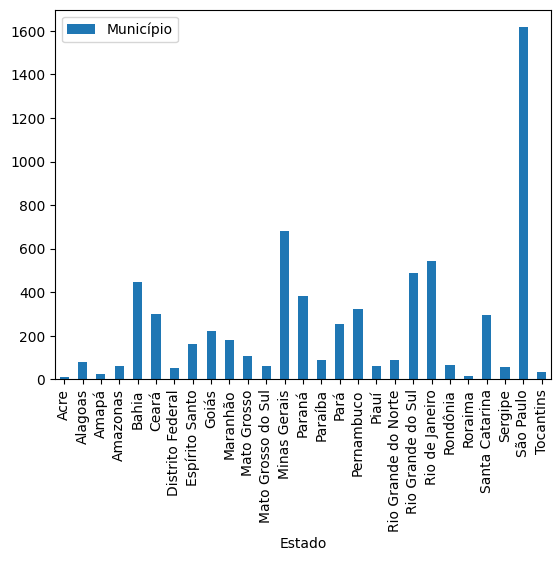

In [32]:
renda.groupby("Estado").agg("count").plot(y="Município", kind="bar")

O parâmetro *kind* identifica qual o tipo de gráfico deverá ser feito,
alguns de seus possíveis valores são:

-   'line' : gráfico de linha
-   'bar' : barras verticais
-   'barh' : barras horizontais
-   'box' : boxplot
-   'scatter' : dispersão

Podemos gerar um **histograma** de um atributo por meio da função hist:

array([[<Axes: title={'center': 'Total pessoas > 10 anos'}>]],
      dtype=object)

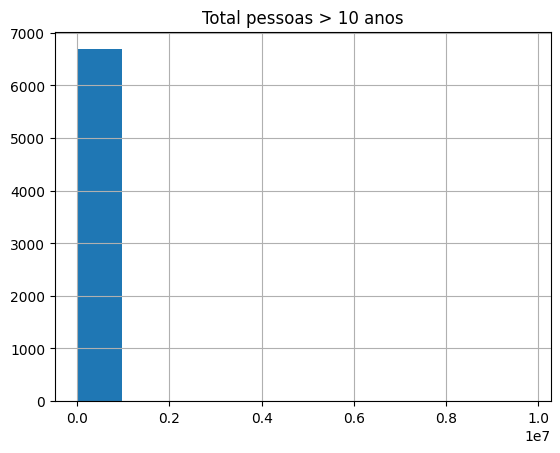

In [33]:
renda.hist("Total pessoas > 10 anos")

Podemos visualizar a distribuição da renda no estado do Paraná. Na
tabela \"renda\", a coluna \"Total pessoas \> 10 anos\" é a soma das
outras colunas e, portanto, não faz sentido utilizá-la na plotagem do
gráfico. Também não faz sentido usar a coluna \"Código da Unidade
Geográfica\".

<Axes: >

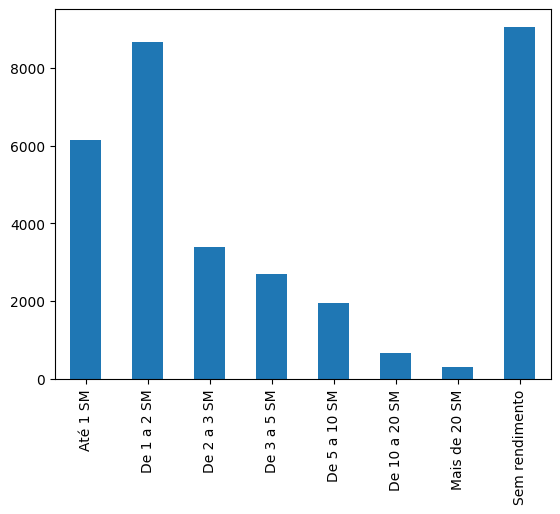

In [34]:
condicao = renda["Estado"] == "Paraná"
renda_parana = renda[condicao]
numeric_columns = renda_parana.select_dtypes(include=['number']) # Extrai apenas valores numericos
renda_parana = numeric_columns.agg("mean")
colunas = ["Até 1 SM", "De 1 a 2 SM", "De 2 a 3 SM", "De 3 a 5 SM", "De 5 a 10 SM",
           "De 10 a 20 SM", "Mais de 20 SM", "Sem rendimento"]
renda_parana[colunas].plot(kind='bar')

Medidas de tendência central
----------------------------

É conveniente dispor de medidas que informem sobre a amostra de maneira
mais resumida do que os dados brutos são capazes de fazer.

As medidas de tendência central cumprem este papel, dando o valor do
ponto em torno do qual os dados se distribuem.

### Média (mean)

Podemos facilmente calcular a média de pessoas nas cidades de Rondônia
com renda de até 1 salário mínimo:

In [35]:
condicao = renda["Estado"] == "Rondônia"
numeric_columns = renda[condicao].select_dtypes(include=['number'])
media = numeric_columns.agg("mean")["Até 1 SM"]
print(media)

6886.123076923077


### Mediana (median)

A vantagem da mediana em relação à média é que a mediana pode dar uma
ideia melhor de um valor típico porque não é tão distorcida por valores
extremamente altos ou baixos, chamados de **outliers**.

Podemos calcular a mediana de pessoas nas cidades de cada estado com
renda de até 1 salário mínimo:

In [36]:
renda_estado_1sm = pd.to_numeric(renda.groupby("Estado")["Até 1 SM"], errors="coerce") # remove valores nao numericos
print(renda_estado_1sm.agg("median"))

Estado
Acre                   9424.0
Alagoas                8475.0
Amapá                  4500.5
Amazonas               9191.0
Bahia                  7981.0
Ceará                  9589.5
Distrito Federal       6715.5
Espírito Santo         4393.5
Goiás                  5639.0
Maranhão               8607.5
Mato Grosso            4043.5
Mato Grosso do Sul     5687.0
Minas Gerais           5507.0
Paraná                 3748.0
Paraíba                7241.0
Pará                   8236.0
Pernambuco             8299.0
Piauí                  9606.0
Rio Grande do Norte    7227.0
Rio Grande do Sul      3385.5
Rio de Janeiro         4650.5
Rondônia               4202.0
Roraima                4398.0
Santa Catarina         2162.0
Sergipe                8283.5
São Paulo              3367.5
Tocantins              5638.0
Name: Até 1 SM, dtype: float64


Para efeitos de comparação, vamos calcular também a média:

In [37]:
print(renda_estado_1sm.agg(["median", "mean"]))

                     median          mean
Estado                                   
Acre                 9424.0  14199.384615
Alagoas              8475.0  13788.320988
Amapá                4500.5   8976.250000
Amazonas             9191.0  15398.754098
Bahia                7981.0  12415.164045
Ceará                9589.5  14543.506667
Distrito Federal     6715.5  13851.865385
Espírito Santo       4393.5   6991.926829
Goiás                5639.0   8648.668182
Maranhão             8607.5  12696.027473
Mato Grosso          4043.5   6495.783019
Mato Grosso do Sul   5687.0  10790.745763
Minas Gerais         5507.0   8774.332357
Paraná               3748.0   6157.146597
Paraíba              7241.0  13196.288889
Pará                 8236.0  12022.055336
Pernambuco           8299.0  12651.055385
Piauí                9606.0  15773.786885
Rio Grande do Norte  7227.0  11593.436782
Rio Grande do Sul    3385.5   5794.729508
Rio de Janeiro       4650.5   9931.885609
Rondônia             4202.0   6886

### Moda (mode)

Podemos verificar qual o estado tem o maior número de municípios na
tabela, podemos ver a moda do atributo estado:

In [38]:
print(renda["Estado"].agg("mode"))

0    São Paulo
Name: Estado, dtype: object


Se quiser computar as contagens, também é fácil:

In [39]:
print(renda["Estado"].value_counts())

Estado
São Paulo              1616
Minas Gerais            683
Rio de Janeiro          542
Rio Grande do Sul       488
Bahia                   445
Paraná                  382
Pernambuco              325
Ceará                   300
Santa Catarina          296
Pará                    253
Goiás                   220
Maranhão                182
Espírito Santo          164
Mato Grosso             106
Paraíba                  90
Rio Grande do Norte      87
Alagoas                  81
Rondônia                 65
Piauí                    61
Amazonas                 61
Mato Grosso do Sul       59
Sergipe                  58
Distrito Federal         52
Tocantins                33
Amapá                    24
Roraima                  15
Acre                     13
Name: count, dtype: int64


Medidas de dispersão
--------------------

### Variância (var)

Podemos calcular facilmente a variância de um atributo:

In [40]:
print(renda["Até 1 SM"].agg("var"))

736337040.2349224


### Desvio padrão (std)

A variância tem a desvantagem, por causa do efeito de elevar ao
quadrado, de não estar na mesma escala de unidades que a variável
medida.

Por exemplo, se estudamos variabilidade da altura em uma amostra, a
variável é avaliada em $m$ (metro) enquanto a variância é avaliada em
$m^2$ (metro ao quadrado).

Para facilitar a análise da variabilidade da medida, usamos a raiz
quadrada da variância, denominada desvio padrão amostral:
$$\sigma = \sqrt{\frac{\displaystyle \sum_{i=1}^n (x_i - \bar{x})^2}{n-1}}$$
Podemos calcular o desvio padrão de cada atributo:

In [41]:
print(renda["Até 1 SM"].agg("std"))

27135.530955463582


Específico do Pandas: comando describe
--------------------------------------

O Pandas oferece um comando que mostra várias das medidas de uma vez, e
já removendo colunas que possuem textos, sobre as quais não faz sentido
calculá-las:

In [42]:
print(renda.describe())

       Total pessoas > 10 anos      Até 1 SM   De 1 a 2 SM    De 2 a 3 SM  \
count             6.701000e+03  6.701000e+03  6.701000e+03    6701.000000   
mean              3.640487e+04  8.809393e+03  7.873761e+03    2862.383376   
std               1.603089e+05  2.713553e+04  3.616990e+04   14629.475153   
min               2.501000e+03  1.890000e+02  3.760000e+02      19.000000   
25%               1.405000e+04  3.118000e+03  2.959000e+03     939.000000   
50%               2.102100e+04  5.068000e+03  4.298000e+03    1540.000000   
75%               2.999200e+04  8.315000e+03  6.612000e+03    2484.000000   
max               9.783868e+06  1.238070e+06  2.311909e+06  942491.000000   

        De 3 a 5 SM   De 5 a 10 SM  De 10 a 20 SM  Mais de 20 SM  \
count    6701.00000    6701.000000    6701.000000    6701.000000   
mean     2383.09909    1793.890613     694.707954     340.965826   
std     13454.08425   12076.195867    5742.716173    3321.780069   
min        11.00000       0.000000

In [43]:
# descrição sobre as linhas onde o estado é o Rio de Janeiro na tabela renda:
condicao = renda["Estado"] == "Rio de Janeiro"
print(renda[condicao].describe())

       Total pessoas > 10 anos       Até 1 SM   De 1 a 2 SM    De 2 a 3 SM  \
count             5.420000e+02     542.000000  5.420000e+02     542.000000   
mean              4.888324e+04    9931.885609  1.067500e+04    4027.743542   
std               2.477035e+05   41282.337532  5.227314e+04   21536.819885   
min               2.977000e+03     448.000000  7.780000e+02     283.000000   
25%               1.677375e+04    3139.500000  3.196000e+03    1251.750000   
50%               2.283800e+04    4650.500000  4.982000e+03    1882.000000   
75%               3.148175e+04    6554.000000  7.190000e+03    2788.500000   
max               5.559923e+06  889169.000000  1.163682e+06  486076.000000   

         De 3 a 5 SM   De 5 a 10 SM  De 10 a 20 SM  Mais de 20 SM  \
count     542.000000     542.000000     542.000000     542.000000   
mean     3439.684502    2798.704797    1218.832103     585.944649   
std     20588.912373   19334.560208    9890.480276    5266.579524   
min       151.000000 

-   **count**: conta a quantidade de linhas envolvidas
-   **mean**: calcula a média dos elementos da coluna
-   **std**: calcula o desvio padrão dos elementos da coluna
-   **min**: menor elemento da coluna (0% dos elementos são menores do
    que ele)
-   **25%**: primeiro quartil da coluna (25% dos elementos são menores
    do que ele)
-   **50%**: segundo quartil da coluna, equivalente à mediana (50% dos
    elementos são menores do que ele)
-   **75%**: terceiro quartil da coluna (75% dos elementos são menores
    do que ele)
-   **max**: maior elemento da coluna (100% dos elementos são menores do
    que ele)

### Boxplot

O boxplot é um gráfico que mostra, de uma vez só, o mínimo, primeiro,
segundo e terceiro quartis, e o máximo de um conjunto de dados.

Ele também mostra os **outliers** do conjunto (discrepantes, valores que
são extremamente mais altos ou mais baixos do que o resto).

O Pandas oferece a função `boxplot()`, que espera receber a coluna ou
lista de colunas que armazenam os valores e também espera receber o
parâmetro `by`\"coluna\"=: um boxplot vai ser feito para cada valor
diferente que estiver nessa coluna.

Por exemplo, vamos observar a distribuição da população dos estados
brasileiros, com base no número de pessoas com mais de 10 anos que foram
entrevistadas pelo Censo 2010 (isto é, uma amostra da população).

Os valores que queremos observar estão na coluna \"Total pessoas \> 10
anos\", que tem o total de pessoas entrevistadas em cada cidade.

Como queremos saber a distribuição em cada estado, o parâmetro `by=` vai
receber a coluna \"Estado\". Assim, haverá um boxplot para cada estado:

<Axes: title={'center': 'Total pessoas > 10 anos'}, xlabel='Estado'>

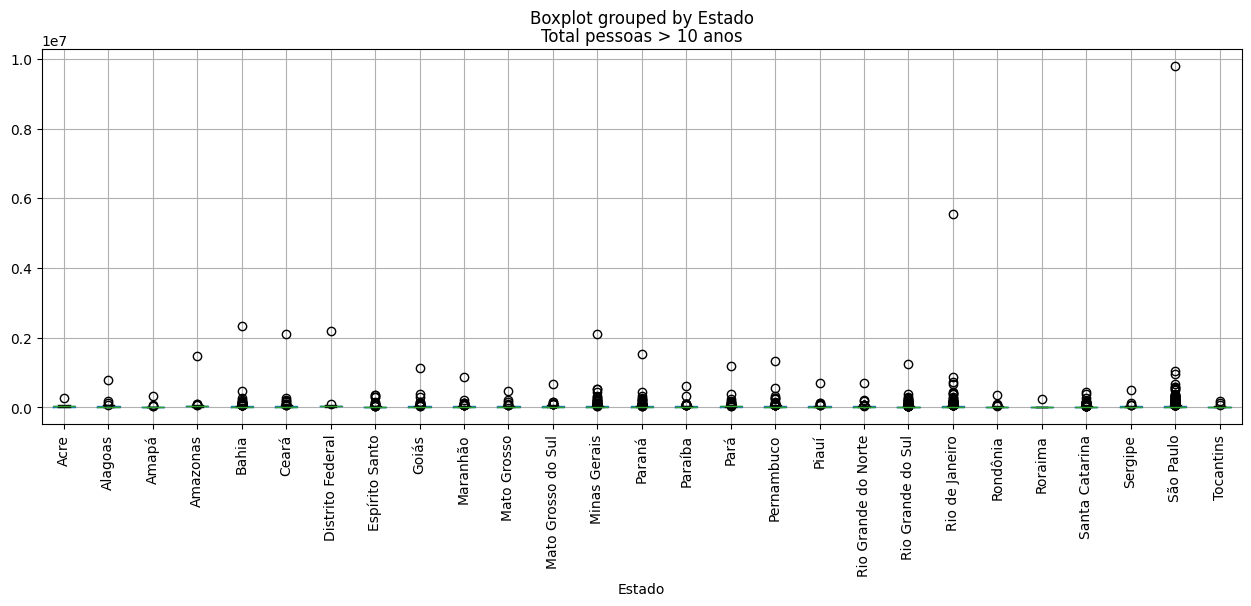

In [44]:
# o parâmetro rot=90 está indicando que a legenda está rotacionada 90 graus, para podermos ler melhor os nomes:
renda.boxplot("Total pessoas > 10 anos", by="Estado", figsize=(15,5), rot=90)

A única coisa que dá para enxergar no gráfico acima é que o boxplot
referente a São Paulo tem um outlier (sinal +) bem acima de todos os
outros (não surpreendentemente, São Paulo possui a maior população do
país e a cidade de São Paulo tem uma população muito maior do que a
população das outras cidades dentro do próprio estado).

Vamos visualizar apenas os estados do sul do Brasil:

<Axes: title={'center': 'Total pessoas > 10 anos'}, xlabel='Estado'>

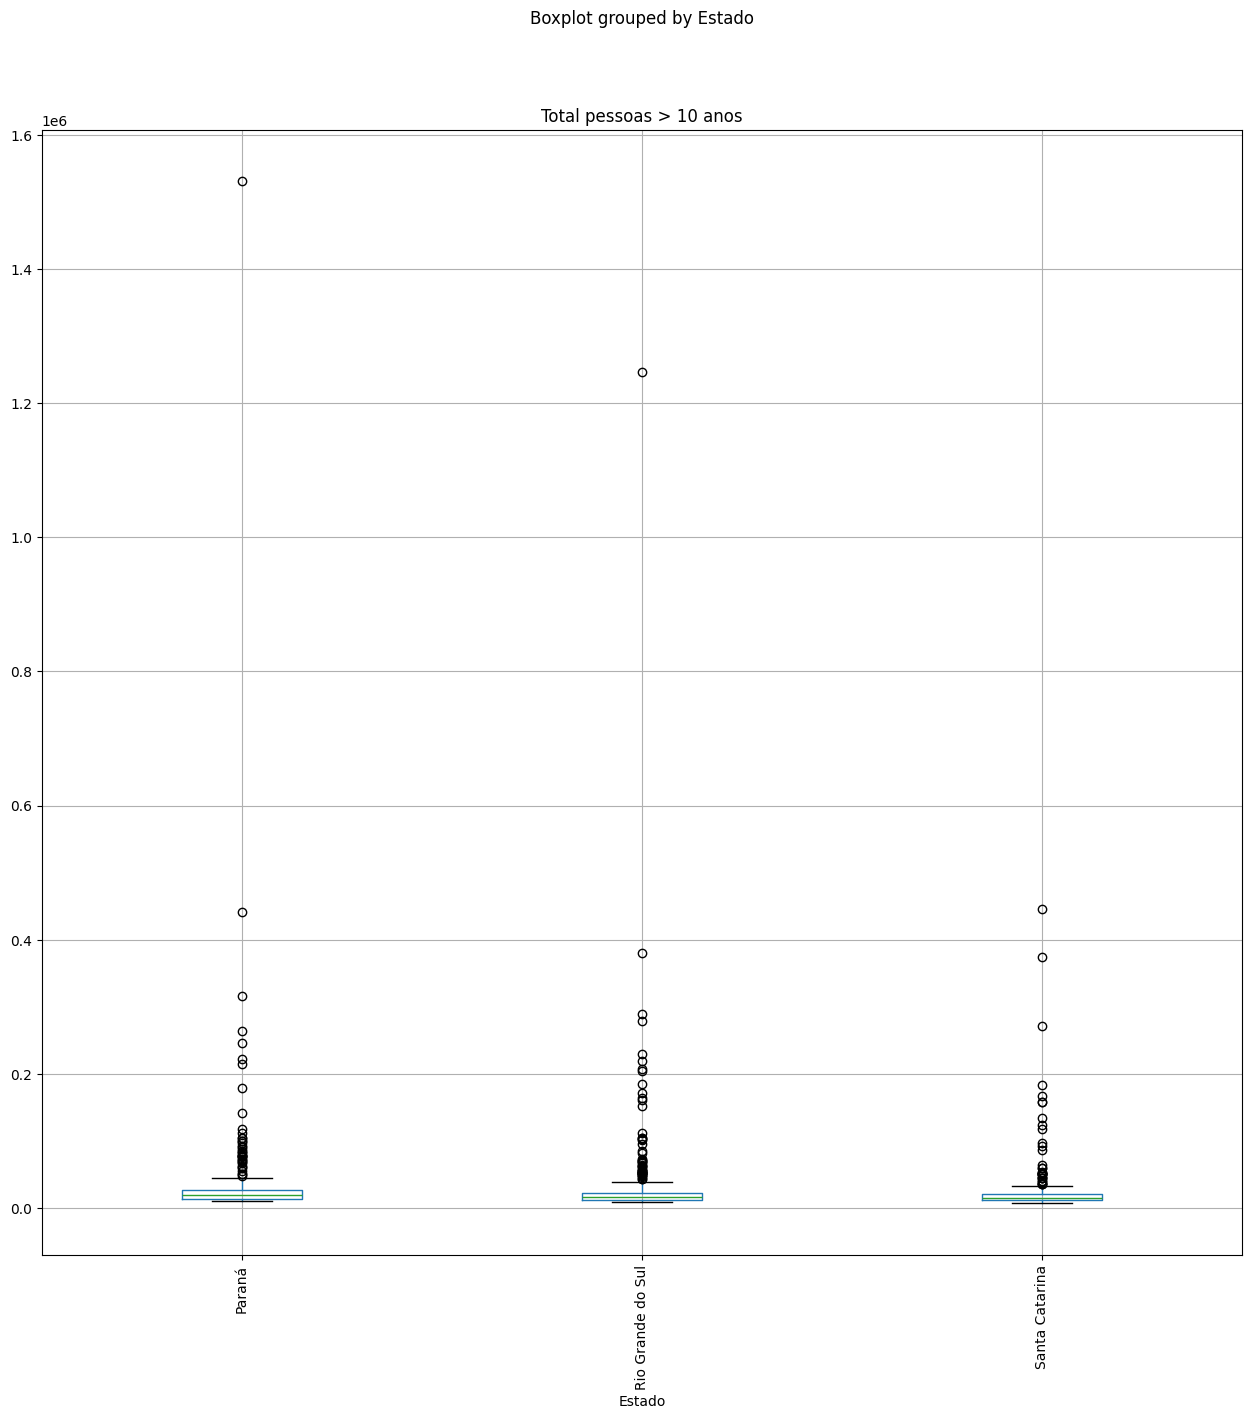

In [45]:
condicao = (renda["Estado"] == "Paraná") | (renda["Estado"] == "Santa Catarina") | (renda["Estado"] == "Rio Grande do Sul")
renda[condicao].boxplot("Total pessoas > 10 anos", by="Estado", figsize=(15,15), rot=90)

Veja que infelizmente os outliers estão nos impedindo de enxergar o
restante do gráfico.

Eles são importantes: podemos ver, no Paraná, por exemplo, que tem uma
cidade que tem mais de 1 milhão e meio de habitantes que foram
entrevistados (provavelmente Curitiba):

In [46]:
condicao = renda["Município"] == "Curitiba"
print(renda[condicao])

      Estado Município  Total pessoas > 10 anos  Até 1 SM  De 1 a 2 SM  \
5194  Paraná  Curitiba                  1531838    182709       355862   

      De 2 a 3 SM  De 3 a 5 SM  De 5 a 10 SM  De 10 a 20 SM  Mais de 20 SM  \
5194       182631       168139        153011          64119          32056   

      Sem rendimento  
5194          393312  


Mas o ponto é que a grande maioria das cidades do Paraná tiveram menos
de 50000 habitantes entrevistados pelo censo (como podemos ver acima).

Podemos usar a opção `showfliers=False` para omitir os outliers do
boxplot:

<Axes: title={'center': 'Total pessoas > 10 anos'}, xlabel='Estado'>

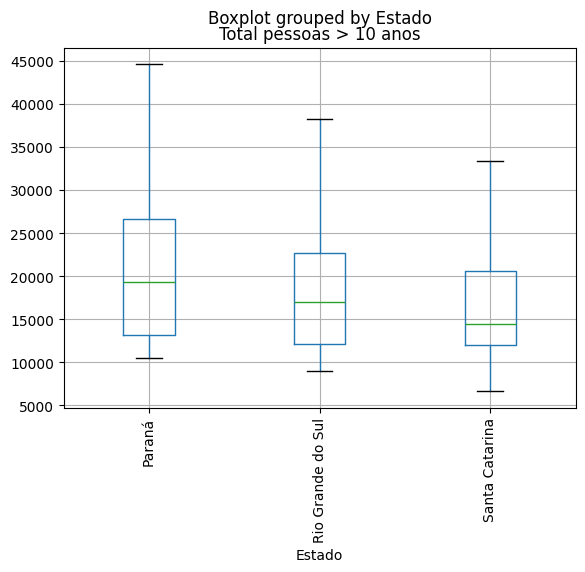

In [47]:
condicao = (renda["Estado"] == "Paraná") | (renda["Estado"] == "Santa Catarina") | (renda["Estado"] == "Rio Grande do Sul")
renda[condicao].boxplot("Total pessoas > 10 anos", by="Estado", rot=90, showfliers=False)

Veja que os dados utilizados para gerar o boxplot acima são os mesmos
que aparecem no comando `describe()` que vimos anteriormente:

In [48]:
condicao = (renda["Estado"] == "Paraná") | (renda["Estado"] == "Santa Catarina") | (renda["Estado"] == "Rio Grande do Sul")
renda_agrupada = renda[condicao].groupby("Estado")
# em renda_agrupada queremos observar apenas a coluna que tem o número de pessoas:
print(renda_agrupada["Total pessoas > 10 anos"].describe())

                   count          mean           std      min       25%  \
Estado                                                                    
Paraná             382.0  32901.123037  86497.643826  10562.0  13150.00   
Rio Grande do Sul  488.0  28273.500000  65848.278625   9050.0  12173.50   
Santa Catarina     296.0  25185.192568  42194.367148   6654.0  12001.75   

                       50%       75%        max  
Estado                                           
Paraná             19387.5  26670.50  1531838.0  
Rio Grande do Sul  16982.5  22713.75  1246317.0  
Santa Catarina     14452.0  20619.00   445974.0  


Ou seja, podemos utilizar o comando `describe()` se quisermos saber os
valores com exatidão e podemos utilizar o gráfico para ter uma ideia
mais visual.


# Seaborn

[Seaborn](https://seaborn.pydata.org/introduction.html) é uma biblioteca para a geração de gráficos em Python. De forma mais precisa, essa biblioteca facilita a criação de gráficos comuns em análises de dados, mas a biblioteca que faz o _trabalho sujo_ na parte dos gráficos é o a biblioteca [matplotlib](https://matplotlib.org/) que também vale a pena conhecer.

Vamos começar importando ela e a base de dados que usaremos de exemplo `Penguins`.




In [49]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Análise visual de múltiplas variáveis

`Bill length` e `bill depth` são atributos relacionados ao bico do pinguim. Podemos ver qual a relação dos valores desses dois atributos entre as diferentes espécies usando um gráfico de dispersão. Vamos então colorir cada ponto de acordo com sua espécie. Podemos deixar o gráfico ainda mais rico, trocaremos o tipo do marcador do ponto no gráfico de acordo com o sexo do pinguim. Note que um gráfico de 2 dimensões está trazendo na verdade informações sobre 4 atributos da base de dados.
Para isso utilizaremos a função `relplot`.

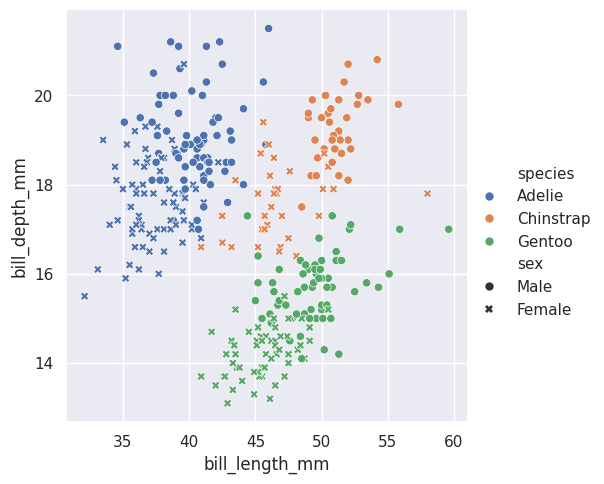

In [50]:
#vamos usar o tema padrão, mas você pode explorar customizações
sns.set_theme()
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", style="sex")

Essa é apenas uma das possibilidades dessa função, você pode ver mais informações [aqui](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot).

Embora um gráfico desse formato seja muito útil e rico, às vezes gostaríamos de ter uma  melhor ideia de um atributo específico. Por exemplo, gostaríamos de ter uma ideia da distribuição de valores de `bill_length_mm` de acordo com a espécie. Essa informação está no gráfico, mas não tão fácil de ser analisada.
Poderíamos fazer a estimação de densidade em relação ao `bill_length_mm` para os dados de diferentes classes. Isso nos  geraria três gráficos de distribuição de densidade. Como ele é uma informação muito próximo ao último gráfico visto, é comum adicionarmos nos eixos esse tipo de informação. Note que ao isolar um atributo do gráfico 2d, estamos de certa forma fazendo uma projeção dos dados.
A função `joinplot` nos ajuda com isso.

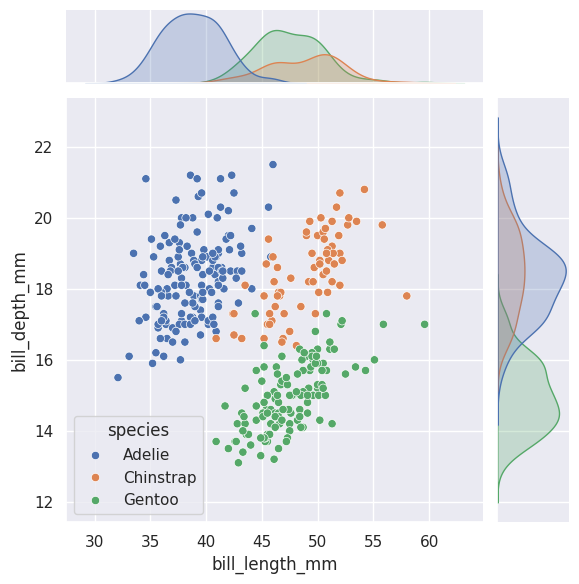

In [51]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

Sim, esses gráficos colados aos eixos são obtidos usando a técnica de estimação de densidade não paramétrica que vimos em aula :-)
No caso ele utiliza um _kernel gaussiano_, você pode ver mais detalhes [aqui](https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde).

Embora esse último gráfico seja muito informativo, ainda temos uma certa dificuldade de analisarmos a distribuição conjunta entre `bill_length_mm` e `bill_depth_mm` para cada espécie. Raramente usamos gráficos 3d para as análises, então uma forma de visualizar a distribuição conjunta seria o gráfico de contorno. Isso é bem fácil de fazer no seaborn:

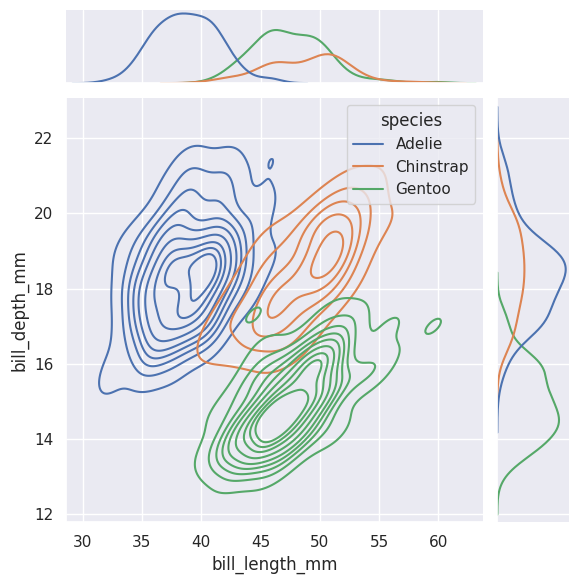

In [52]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

Essas são apenas algumas das opções básicas do `jointplot`, você pode ver mais opções [aqui](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot).

# Boxplot e sua variação mais conhecida

Quando analisamos uma base de dados como um todo, é sempre importante olhar as relações entre os diferentes atributos. No entanto, algumas vezes queremos olhar a distribuição dos valores de um atributo de forma bastante sumarizada. Como vimos, o _boxplot_ é uma boa ferramenta para apresentar essa sumarização de forma gráfica.
Já vimos como gerar uma _boxplot_ por meio do `Pandas` (que na verdade usa `matplotlib` também). Vamos ver um exemplo de como fazê-lo no seaborn agora.
Continuaremos olhando o atributo `bill_length_mm_` para as diferentes espécies.

<Axes: xlabel='species', ylabel='bill_length_mm'>

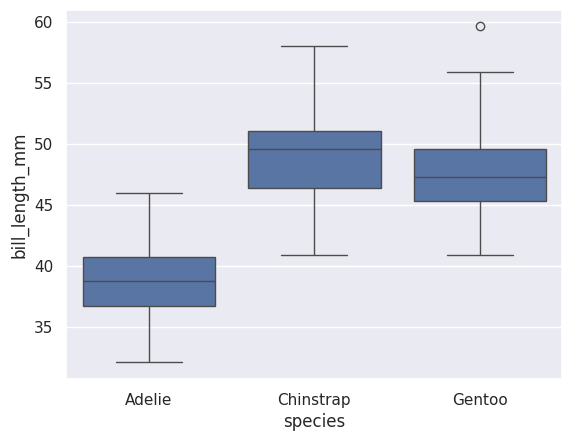

In [53]:
sns.boxplot(data=penguins, x="species", y="bill_length_mm")

Mesmo neste formato sumarizado a intersecção entre as espécies `Chinstrap` e `Gentoo` fica evidente.
Uma forma alternativa de boxplot, que muitos gostam, é chamada de `violinplot`.
A ideia é trocar o formato de caixa por um formato de violino (não diga, né? :-D), em que a região mais larga seja a região onde tem mais pontos. Se você pensou densidade ou estimação de densidade não paramétrica, pensou certo :-).
Abaixo tem uma versão do `violinplot` com as marcações dos quartis para facilitar a comparação com o boxplot acima.

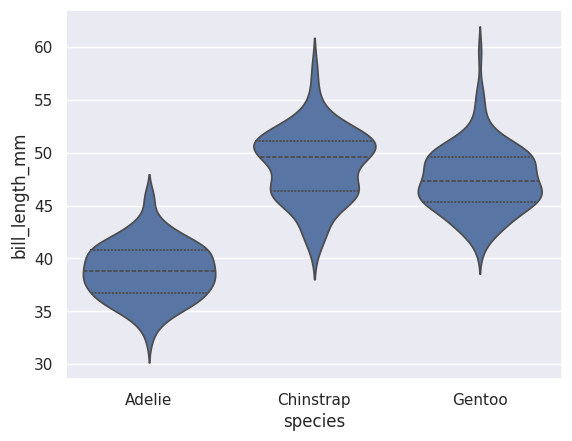

In [54]:
ax = sns.violinplot(x="species", y="bill_length_mm", data=penguins, inner = "quartile" )

O formato mais comum de se exibir um `violinplot` na verdade é colocando os pontos sobre ele, sem nenhuma marcação de quartis, conforme abaixo:

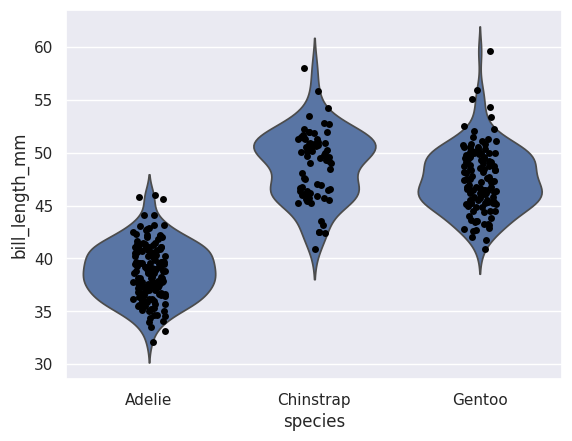

In [55]:
ax = sns.violinplot(x="species", y="bill_length_mm", data=penguins, inner=None)
ax = sns.stripplot(x="species", y="bill_length_mm", color="black", data=penguins)

Muitas das escolhas envolvidas em gráficos são questões de gosto.
Mas, algumas regras básicas devem servir de guia:
- adicione componentes em um gráfico apenas se eles trouxerem informações adicionais;
- evite cores que pessoas com daltonismo tenham dificuldades (pode ler mais sobre isso [aqui](https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40);
- qual informação está disposta em cada eixo do seu gráfico não deve ser um mistério, por isso deixe claro com rótulos nos eixos.